### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

### <font color='red'> Regression Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1: read the data for regression

In [2]:
data1= pd.read_csv("Twitter_data.csv")

check the information of data1:

In [3]:
data1.head(22)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5
5,1,0,0,1,2,3,0,1,0,0,...,1.0,0.0,1,0,0,1,2,3,0,1.0
6,1,0,0,0,2,0,2,1,0,0,...,0.0,1.0,1,0,0,0,2,0,2,0.0
7,0,2,0,0,0,1,1,0,2,0,...,1.0,1.0,0,2,0,0,0,1,1,2.0
8,2,0,0,0,1,1,2,2,0,0,...,1.0,1.0,2,0,0,0,1,1,2,1.0
9,0,1,1,2,2,0,3,0,1,1,...,0.0,1.0,0,1,1,2,2,0,3,0.5


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
0     583250 non-null int64
1     583250 non-null int64
2     583250 non-null int64
3     583250 non-null int64
4     583250 non-null int64
5     583250 non-null int64
6     583250 non-null int64
7     583250 non-null int64
8     583250 non-null int64
9     583250 non-null int64
10    583250 non-null int64
11    583250 non-null int64
12    583250 non-null int64
13    583250 non-null int64
14    583250 non-null float64
15    583250 non-null float64
16    583250 non-null float64
17    583250 non-null float64
18    583250 non-null float64
19    583250 non-null float64
20    583250 non-null float64
21    583250 non-null float64
22    583250 non-null float64
23    583250 non-null float64
24    583250 non-null float64
25    583250 non-null float64
26    583250 non-null float64
27    583250 non-null float64
28    583250 non-null int64
29    583250 non-null int64
30    583250 non-null

In [5]:
data1.dtypes[0:5]

0    int64
1    int64
2    int64
3    int64
4    int64
dtype: object

In [6]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


## common data information for rest of regressions

In [7]:
X=data1.iloc[:,0:77]
y=np.array(data1.iloc[:,77])

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

numpy.ndarray

sampling

In [10]:
from sklearn.model_selection import train_test_split

x_sample,sample_data,y_sample,sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [11]:
sample_target

array([12.5, 15.5, 14.5, ..., 86. , 10.5,  5.5])

In [12]:
len(sample_target)

58325

In [13]:
sample_data

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
520999,5,5,3,13,18,3,12,4,5,2,...,1.000000,1.000000,1.000000,5,5,3,13,18,3,12
262606,18,13,15,11,14,16,21,13,11,16,...,1.142857,1.000000,1.090909,18,13,15,11,14,16,22
211628,26,8,14,29,20,25,37,23,8,13,...,1.000000,1.000000,1.000000,26,8,14,29,20,25,37
263991,371,341,513,563,643,524,428,192,169,298,...,1.000000,1.000000,1.000000,371,341,513,563,643,524,428
429272,101,137,190,303,220,180,142,77,114,163,...,1.068182,1.105556,1.035211,103,138,191,304,220,180,142
66262,0,1,1,1,2,0,1,0,0,0,...,2.000000,0.000000,1.000000,0,1,1,1,2,0,1
254385,664,631,728,879,912,810,889,470,502,507,...,1.000000,1.000000,1.000000,664,631,728,879,912,810,889
174306,250,162,167,148,171,280,332,92,71,70,...,1.035088,1.025000,1.027108,251,162,169,149,171,280,332
381893,68,74,138,143,185,296,138,41,45,77,...,1.021622,1.033784,3.321429,69,74,138,143,185,296,140
561232,29,3,6,4,14,12,20,14,2,5,...,1.000000,1.000000,1.000000,29,3,6,4,14,12,20


In [14]:
from sklearn.preprocessing import MinMaxScaler #standarized
from sklearn.model_selection import train_test_split #validation

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org) #原本data frame變成array
X_test = scaler.transform(X_test_org)

## Knn regression:

###### KNN regression with  grid search and cv = 5: 

In [15]:
#knnx and knny have done the standarize already. 

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor()
param_grid = {'n_neighbors':[1,5,10,15,20,25,30]}

grid_knnr = GridSearchCV(knnr, param_grid=param_grid, cv = 5)
grid_knnr.fit(X_train, y_train) 
grid_knnr.score(X_train, y_train)

0.9999999842971941

In [16]:
grid_knnr.score(X_test, y_test)

0.8889423003885145

In [17]:
grid_knnr.best_params_

{'n_neighbors': 1}

In [18]:
grid_knnr.cv_results_['mean_test_score'] # 10 n neighbors

array([0.89369172, 0.89323441, 0.88366407, 0.87270129, 0.86123847,
       0.85287263, 0.84436899])

The best K in Knn regression with cv= 5 is 1 / The testing score is 0.89

coeficient of KNN regression

In [19]:
knn_reg = KNeighborsRegressor(1)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

## Linear regression using the Normal Equation

linear regression train and test scores

In [20]:
from sklearn.linear_model import LinearRegression #linear regression

lreg = LinearRegression() 
lreg.fit(X_train, y_train) 
lreg.score(X_test, y_test)

0.9381635357854351

In [21]:
lreg.coef_

array([ 6.67894952e+04,  9.23481662e+04,  9.87916091e+04,  5.17577192e+04,
       -3.36233935e+04, -7.05120925e+04,  1.06573956e+05, -2.20106574e+03,
       -4.56058183e+02, -3.74262172e+02,  6.27755874e+02, -1.69952630e+02,
        1.22359863e+03,  5.47639195e+03,  8.22423758e+03,  3.15985466e+03,
        1.32695368e+03, -7.18390425e+03,  4.11514160e+03,  5.20543615e+03,
       -8.73000140e+03, -2.16304093e+01, -1.89342572e+01, -4.27597297e+01,
       -2.60950057e+01, -9.53228982e+00,  6.21683826e+00, -2.65082293e+01,
        7.73243013e+03, -7.19965521e+03,  5.47592651e+03, -8.05769360e+03,
        2.62232698e+03,  5.99888936e+03,  8.74220635e+03, -5.38370785e+03,
       -2.07435324e+03,  1.23480603e+03,  1.29674531e+04, -2.33188973e+03,
       -2.86793839e+03, -1.54844495e+03,  2.10546772e+01,  1.34016830e+01,
        4.09065211e+01,  2.64567579e+01,  1.07038399e+01, -3.99891553e+00,
        2.69270613e+01, -2.10368817e+01, -4.92906663e+02,  3.19709930e+02,
        2.00076004e+00,  

In [22]:
lreg.intercept_

3.801491355674642

testing score: 0.94

linear_visualization

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm) #predict from the 0:5 cols dataset

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

## Ridge

Ridge train and test scores with best alpha

##### Ridge regression with grid search and cv = 5:

In [23]:
#we did the scalar for X test and X test before so that we don't have to put the scalar into param_grid again

from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge

ridge2 = Ridge()
param_grid = {'alpha': [0.001,0.01, 0.1, 1, 10, 100]}

grid_ridge2 = GridSearchCV(ridge2, param_grid=param_grid, cv = 5)
grid_ridge2.fit(X_train, y_train)
grid_ridge2.score(X_train, y_train)

0.959520186089446

In [24]:
grid_ridge2.score(X_test, y_test)

0.9371639761022494

In [25]:
grid_ridge2.best_params_

{'alpha': 0.1}

best α parameter is 0.1

In [26]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge coefficient

In [27]:
ridge.intercept_

5.264814612819237

In [28]:
ridge.coef_

array([ 7.29065759e+02,  1.58446538e+03,  2.00380407e+03,  2.47156112e+01,
        1.14132073e+02,  9.87543656e+02,  9.16118695e+03, -1.31818552e+03,
        1.10404751e+02, -7.80961303e+02,  1.11946668e+03,  8.82247360e+02,
        6.78247506e+02,  3.45300014e+03,  3.66391991e+03,  2.73902456e+03,
        3.59917829e+02, -6.55187154e+01,  2.28967813e+03,  1.11113371e+03,
       -7.02604260e+03,  2.06389274e+00,  7.42829596e+00, -5.43756045e+00,
       -2.20254680e+00, -1.86812894e+00,  2.66758361e+00, -1.44275906e+00,
        2.56184078e+02, -2.17333460e+03,  7.60971830e+02, -9.18067990e+02,
       -3.39277408e+02, -2.62726743e+02,  7.90790097e+03, -1.44692015e+03,
       -1.46414960e+03,  2.63198264e+03,  2.64117587e+03, -6.46631273e+02,
        8.93980595e+02, -2.99519703e+03, -3.80437311e+00, -1.43765019e+01,
        3.46140355e+00,  2.77106696e+00,  3.41941510e+00, -2.01103074e-01,
        1.36506390e+00, -6.45275494e+01, -2.01253738e+01,  6.03287470e+01,
       -2.16354678e+01, -

In [29]:
grid_ridge2.cv_results_['mean_test_score'] # 6 alpha MSE

array([0.95115886, 0.95205884, 0.95311807, 0.94853041, 0.91443082,
       0.85865915])

In [30]:
print('Train score: {:.4f}'.format(grid_ridge2.score(X_train,y_train)))
print('Test score: {:.4f}'.format(grid_ridge2.score(X_test, y_test)))

Train score: 0.9595
Test score: 0.9372


Testing score: 0.9372

Ridge visualization with alpha and coefficients

In [ ]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2) #和在一起
coeff = []

for alpha in x_range: #抓值
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
#print(coeff)    
coeff = np.array(coeff) #coefficient of all variables#we can transfer list into array directly

#plot 

for i in range(0,77):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i)) #13 cols#matrix取法

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True) #box調整
plt.show()

#coefficient在抹個alfa直開示收斂

## lasso

lasso train and test scores

##### lasso regression with grid search and cv = 5:

In [31]:
#we did the scalar for X test and X test before so that we don't have to put the scalar into param_grid again

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso2 = Lasso()
param_grid = {'alpha': [0.0001,0.001,0.01, 0.1, 1, 10, 100]}

grid_lasso2 = GridSearchCV(lasso2, param_grid=param_grid, cv = 5)
grid_lasso2.fit(X_train, y_train)
grid_lasso2.score(X_train, y_train)

C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

0.959034797921859

In [32]:
grid_lasso2.score(X_test, y_test)

0.9384893157997043

In [33]:
grid_lasso2.best_params_

{'alpha': 0.01}

The best alpha is suggested to be 0.01

coefficient of lasso

In [34]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha = 0.01)
Lasso.fit(X_train,y_train)

C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
Lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  4.34564692e+03, -0.00000000e+00,
       -0.00000000e+00,  7.65271464e+02,  2.17482357e+04, -6.33794637e+02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  6.59564127e+02,
        7.19711324e+02,  2.71587986e+03,  2.37517155e+03,  1.50245179e+03,
        7.73990345e+02,  4.42879904e+02,  1.71922497e+03,  2.27880514e+03,
       -7.84438991e+03, -0.00000000e+00,  0.00000000e+00, -1.01603388e+00,
       -0.00000000e+00,  1.17016888e+00,  2.04709305e+00,  0.00000000e+00,
       -0.00000000e+00, -3.84403950e+02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.79240594e+03, -2.88399904e+02,
       -1.81726400e+01,  2.15316300e+03,  1.03907736e+03, -0.00000000e+00,
        5.50606415e+01, -2.38341948e+03, -1.58942740e+00, -6.81497471e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.31356513e-01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [36]:
Lasso.intercept_

4.975302601228094

In [37]:
grid_lasso2.cv_results_['mean_test_score'] # 6 alpha MSE

array([ 9.50852140e-01,  9.51342355e-01,  9.53208134e-01,  9.49558471e-01,
        9.30458421e-01,  4.81974149e-01, -1.51266960e-05])

In [38]:
print('Train score: {:.4f}'.format(grid_lasso2.score(X_train,y_train)))
print('Test score: {:.4f}'.format(grid_lasso2.score(X_test, y_test)))

Train score: 0.9590
Test score: 0.9385


The testing score is 0.9385

lasso visualization for best alpha with coeffcients for each variable

In [ ]:
from sklearn.linear_model import Lasso
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

#alpha直接抓直--> 非index(location)
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,77):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show() #how many features what alfa chooses

### <font color='red'> Apply any two models with bagging and any two models with pasting.

In [39]:
from sklearn.ensemble import BaggingRegressor

### lasso for bagging:

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
bag_reg5 = BaggingRegressor(lasso, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_reg5.fit(X_train, y_train)
y_pred5 = bag_reg5.predict(X_test)

In [42]:
print('Train score: {:.2f}'.format(bag_reg5.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg5.score(X_test, y_test)))

Train score: 0.92
Test score: 0.92


Testing score : 0.92

### Ridge for bagging:

In [43]:
ridge = Ridge(alpha = 0.1)
bag_reg4 = BaggingRegressor(ridge, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_reg4.fit(X_train, y_train)
y_pred4 = bag_reg4.predict(X_test)

In [44]:
print('Train score: {:.2f}'.format(bag_reg4.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg4.score(X_test, y_test)))

Train score: 0.83
Test score: 0.85


Testing score : 0.85

bagging: Lasso is better that Ridge

### Linear for pasting:

In [45]:
lreg = LinearRegression() 
bag_reg2 = BaggingRegressor(lreg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_reg2.fit(X_train, y_train)
y_pred2 = bag_reg2.predict(X_test)

In [46]:
print('Train score: {:.2f}'.format(bag_reg2.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg2.score(X_test, y_test)))

Train score: 0.92
Test score: 0.90


testing score : 0.90

### KNN for pasting:

In [47]:
from sklearn.ensemble import BaggingRegressor

knnr_reg = KNeighborsRegressor(1)
bag_reg1 = BaggingRegressor(knnr_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_reg1.fit(X_train, y_train)
y_pred1 = bag_reg1.predict(X_test)

In [48]:
print('Train score: {:.2f}'.format(bag_reg1.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg1.score(X_test, y_test)))

Train score: 0.57
Test score: 0.66


testing score : 0.66

Pasting : Linear is better than KNN

### <font color='red'> Apply any two models with adaboost boosting.

In [49]:
from sklearn.ensemble import AdaBoostRegressor

### lasso for adaboost boosting:

In [50]:
lasso = Lasso(alpha = 0.01)
ada_reg5 = AdaBoostRegressor(lasso, n_estimators=200,learning_rate=0.5, random_state=0)
ada_reg5.fit(X_train, y_train)

C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

AdaBoostRegressor(base_estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [51]:
print("training score:",ada_reg5.score(X_train,y_train))
print("testing score:",ada_reg5.score(X_test,y_test))

training score: 0.9361770485446912
testing score: 0.898554610405625


testing score : 0.90

### Ridge for adaboost boosting:

In [53]:
ridge = Ridge(alpha = 0.1)
ada_reg4 = AdaBoostRegressor(ridge, n_estimators=200,learning_rate=0.5, random_state=0)
ada_reg4.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         learning_rate=0.5, loss='linear', n_estimators=200,
         random_state=0)

In [54]:
print("training score:",ada_reg4.score(X_train,y_train))
print("testing score:",ada_reg4.score(X_test,y_test))

training score: 0.9404999220483775
testing score: 0.8959841387232516


Testing score : 0.90

 adaboost boosting: Lasso is slightly better than Ridge

### <font color='red'> Apply one model with gradient boosting.

### Gradient Boosting(cannot apply one model for this function)

less estimator:

In [55]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt_fast = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42) #why estimators should be 3 
gbrt_fast.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [56]:
print("Accuracy on training set: {:.3f}".format(gbrt_fast.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_fast.score(X_test, y_test)))

Accuracy on training set: 0.881
Accuracy on test set: 0.859


Accuracy: 0.859

more estimators: 

In [57]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [58]:
print("Accuracy on training set: {:.3f}".format(gbrt_slow.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt_slow.score(X_test, y_test)))

Accuracy on training set: 0.973
Accuracy on test set: 0.930


Accuracy: 0.93

In here, we can observ that the more estimators Gradient Boosting has, the accuraci is higher.

### <font color='red'> PCA

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=0.95) #the same way as the In[48]
X_reduced = pca.fit_transform(sample_data)

In [61]:
pca.n_components_

4

we need to include 4 components when we want to include 95% variance.

In [62]:
np.sum(pca.explained_variance_ratio_)

0.9611248338446726

In [63]:
from sklearn.preprocessing import MinMaxScaler #standarized
from sklearn.model_selection import train_test_split #validation

X_train_org, X_test_org, y_train, y_test = train_test_split(X_reduced,sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org) #原本data frame變成array
X_test = scaler.transform(X_test_org)

## Knn regression:

###### KNN regression with  grid search and cv = 5: 

In [64]:
#knnx and knny have done the standarize already. 

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor()
param_grid = {'n_neighbors':[1,5,10,15,20,25,30]}

grid_knnr = GridSearchCV(knnr, param_grid=param_grid, cv = 5)
grid_knnr.fit(X_train, y_train) 
grid_knnr.score(X_train, y_train)

0.9233193713177328

In [65]:
grid_knnr.score(X_test, y_test)

0.9114537257894553

testing score: 0.91

In [66]:
grid_knnr.best_params_

{'n_neighbors': 5}

In [67]:
grid_knnr.cv_results_['mean_test_score'] # 10 n neighbors

array([0.86862969, 0.87787503, 0.86164024, 0.84622766, 0.82964529,
       0.81938264, 0.81065422])

coeficient of KNN regression

In [68]:
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

report

In [69]:
report_table=[]
report_table = report_table + [['KnnR', 'n=5,cv=5', grid_knnr.score(X_train, y_train), grid_knnr.score(X_test, y_test)]]

## Polynomial regression

visualization for the No.5 variable

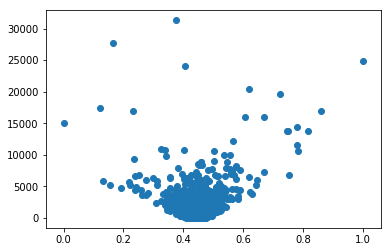

In [70]:
from  sklearn.preprocessing import PolynomialFeatures

X_train_1 = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train)

In [71]:
X_train

array([[2.97225798e-04, 3.63899032e-01, 4.59990600e-01, 4.36624959e-01],
       [3.42665591e-04, 3.63710484e-01, 4.60131933e-01, 4.36588070e-01],
       [1.15808428e-02, 3.63450428e-01, 4.57876285e-01, 4.38864134e-01],
       ...,
       [2.51103049e-03, 3.60762479e-01, 4.59242579e-01, 4.36199309e-01],
       [3.89475623e-04, 3.63447723e-01, 4.60189915e-01, 4.36679222e-01],
       [1.35897654e-03, 3.63372506e-01, 4.58212508e-01, 4.34374855e-01]])

##### the grid search with cv=5 for polynomial regression

pipeline method

In [72]:
from sklearn.model_selection import GridSearchCV
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
poly = PolynomialFeatures()

In [73]:
from sklearn.pipeline import Pipeline

pipe_poly = Pipeline([('poly',PolynomialFeatures()), ('lreg', LinearRegression())])

In [74]:
pipe_poly.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [75]:
param_grid = {'poly__degree': [1,2]}

In [76]:
grid_poly = GridSearchCV(pipe_poly, param_grid=param_grid, cv=5)

grid_poly.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid_poly.best_score_))
print("Test set score: {:.2f}".format(grid_poly.score(X_test, y_test)))
print("Best parameters: {}".format(grid_poly.best_params_))

Best cross-validation accuracy: 0.93
Test set score: 0.89
Best parameters: {'poly__degree': 2}


testing score: 0.89

coefficicent of Polynominal 

In [77]:
poly = PolynomialFeatures(1)

In [78]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
lreg.coef_

array([    0.        , 24272.49667666, 13242.65011986,  1822.95727471,
        6486.99587368])

In [80]:
lreg.intercept_

-8500.09543337929

report

In [81]:
report_table = report_table + [['PolyR', 'degree=2', grid_poly.score(X_train, y_train), grid_poly.score(X_test, y_test)]]

## Linear regression using the Normal Equation

linear regression train and test scores

In [82]:
from sklearn.linear_model import LinearRegression #linear regression

lreg = LinearRegression() 
lreg.fit(X_train, y_train) 
lreg.score(X_test, y_test)

0.9141779797003048

testin g score: 0.91

In [83]:
lreg.coef_

array([24272.49667666, 13242.65011986,  1822.95727471,  6486.99587368])

In [84]:
lreg.intercept_

-8500.095433379269

linear_visualization

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm) #predict from the 0:5 cols dataset

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

report

In [85]:
report_table = report_table + [['LinR', 'None', lreg.score(X_train, y_train),lreg.score(X_test, y_test)]]

## Ridge

##### Ridge regression with grid search and cv = 5:

In [86]:
#we did the scalar for X test and X test before so that we don't have to put the scalar into param_grid again

from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge

ridge2 = Ridge()
param_grid = {'alpha': [0.001,0.01, 0.1, 1, 10, 100]}

grid_ridge2 = GridSearchCV(ridge2, param_grid=param_grid, cv = 5)
grid_ridge2.fit(X_train, y_train)
grid_ridge2.score(X_train, y_train)

0.9199949573235013

In [87]:
grid_ridge2.score(X_test, y_test)

0.9141839477222878

In [88]:
grid_ridge2.best_params_

{'alpha': 0.001}

In [89]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
ridge.intercept_

-8498.004567357917

In [91]:
ridge.coef_

array([24271.54189118, 13239.30444609,  1822.56334877,  6485.42629494])

In [92]:
grid_ridge2.cv_results_['mean_test_score'] # 6 alpha MSE

array([0.91446939, 0.91446797, 0.91439278, 0.90957886, 0.78856021,
       0.26366849])

In [93]:
print('Train score: {:.4f}'.format(grid_ridge2.score(X_train,y_train)))
print('Test score: {:.4f}'.format(grid_ridge2.score(X_test, y_test)))

Train score: 0.9200
Test score: 0.9142


Testing score: 0.9142

Ridge visualization with alpha and coefficients

In [ ]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2) #和在一起
coeff = []

for alpha in x_range: #抓值
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
#print(coeff)    
coeff = np.array(coeff) #coefficient of all variables#we can transfer list into array directly

#plot 

for i in range(0,77):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i)) #13 cols#matrix取法

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True) #box調整
plt.show()

#coefficient在抹個alfa直開示收斂

report

In [94]:
report_table = report_table + [['Ridge', 'alpha=0.001,cv=5', grid_ridge2.score(X_train, y_train), grid_ridge2.score(X_test, y_test)]]

## lasso

lasso train and test scores

##### lasso regression with grid search and cv = 5:

In [95]:
#we did the scalar for X test and X test before so that we don't have to put the scalar into param_grid again

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso2 = Lasso()
param_grid = {'alpha': [0.0001,0.001,0.01, 0.1, 1, 10, 100]}

grid_lasso2 = GridSearchCV(lasso2, param_grid=param_grid, cv = 5)
grid_lasso2.fit(X_train, y_train)
grid_lasso2.score(X_train, y_train)

0.9199949611999427

In [96]:
grid_lasso2.score(X_test, y_test)

0.9141815035816351

In [97]:
grid_lasso2.best_params_

{'alpha': 0.0001}

The best alpha is suggested to be 0.0001

coefficient of lasso

In [99]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha = 0.0001)
Lasso.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
Lasso.coef_

array([24272.32719849, 13241.54577815,  1822.24406992,  6485.88760704])

In [101]:
Lasso.intercept_

-8498.8815054366

In [102]:
grid_lasso2.cv_results_['mean_test_score'] # 6 alpha MSE

array([ 9.14468943e-01,  9.14464016e-01,  9.14406865e-01,  9.13691428e-01,
        8.72242548e-01,  4.01566286e-01, -1.51266960e-05])

In [103]:
print('Train score: {:.4f}'.format(grid_lasso2.score(X_train,y_train)))
print('Test score: {:.4f}'.format(grid_lasso2.score(X_test, y_test)))

Train score: 0.9200
Test score: 0.9142


The testing score is 0.9142

lasso visualization for best alpha with coeffcients for each variable

In [ ]:
from sklearn.linear_model import Lasso
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

#alpha直接抓直--> 非index(location)
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,77):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show() #how many features what alfa chooses

report

In [104]:
report_table = report_table + [['Lasso', 'alpha=0.0001,cv=5', grid_lasso2.score(X_train, y_train), grid_lasso2.score(X_test, y_test)]]

## <font color='red'> PCA REPORT

In [105]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])

In [106]:
report.index = report['Model name']

In [107]:
report

,Model name,Model parameter,Train accuracy,Test accuracy
Model name,,,,
KnnR,KnnR,"n=5,cv=5",0.923319,0.911454
PolyR,PolyR,degree=2,0.945334,0.894965
LinR,LinR,None,0.919995,0.914178
Ridge,Ridge,"alpha=0.001,cv=5",0.919995,0.914184
Lasso,Lasso,"alpha=0.0001,cv=5",0.919995,0.914182


## <font color='red'> Compare with original table:

original table without PCA:

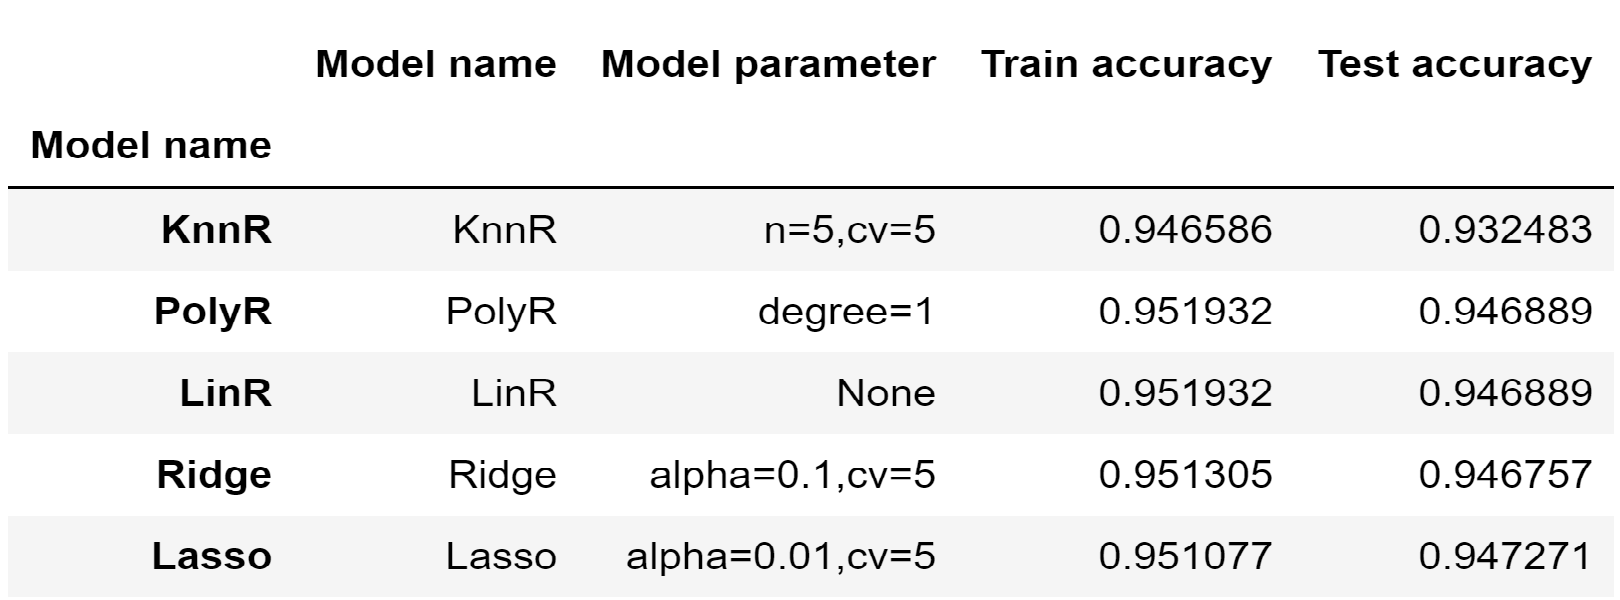

In [ ]:
# Model name	 Model parameter	Train accuracy	Test accuracy		
# KnnR	         n=5,cv=5	        0.946586	    0.932483
# PolyR	         degree=1	        0.951932	    0.946889
# LinR	         None	            0.951932	    0.946889
# Ridge	         alpha=0.1,cv=5	    0.951305	    0.946757
# Lasso	         alpha=0.01,cv=5	0.951077	    0.947271

## <font color='red'> Interpretation:

1.In here, we can see that when testing results are not better when we do the PCA for the dataset. 

2.The original testing scores are better.

3.The testing scores from both are pretty close.

## <font color='red'> Apply deep learning models covered in class

import and slit the dataset

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
data1= pd.read_csv("Twitter_data.csv")

In [110]:
X=data1.iloc[:,0:77]
y=np.array(data1.iloc[:,77])

In [111]:
from sklearn.model_selection import train_test_split

x_sample,sample_data,y_sample,sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [112]:
from sklearn.preprocessing import MinMaxScaler #standarized
from sklearn.model_selection import train_test_split #validation

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org) #原本data frame變成array
X_test = scaler.transform(X_test_org)

deep learning

In [116]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

In [115]:
import keras

C:\Users\Billy Chen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [117]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=77,kernel_initializer='normal', activation='relu'))
    model.add(Dense(8,kernel_initializer='normal', activation='relu'))
    model.add(Dense(1,kernel_initializer='normal'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [118]:
seed = 10
np.random.seed(10)

In [119]:
model = KerasRegressor(build_fn = create_model, verbose = 0) #there is keras regressor

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [120]:
grid_search_result = grid_search.fit(X_train,y_train)

In [123]:
grid_search_result.best_params_

{'batch_size': 40, 'epochs': 50}

'batch_size': 40, 'epochs': 50

evaluation

In [125]:
scores = grid_search_result.evaluate(X_test, y_test)
#print("\n%s: %.2f%%" % (grid_search_result.metrics_names[1], scores[1]*100))

AttributeError: 'GridSearchCV' object has no attribute 'evaluate'

prediction

In [128]:
import sklearn.metrics

In [130]:
from sklearn.metrics import r2_score, recall_score, precision_score

In [132]:
y_train_predict = grid_search_result.predict(X_train)
y_train_predict

array([3.326834 , 2.3742757, 3.3222058, ..., 3.319866 , 3.3138125,
       3.3135934], dtype=float32)

In [133]:
y_test_predict = grid_search_result.predict(X_test)
y_test_predict

array([2.2428033, 2.927953 , 3.361539 , ..., 3.3276787, 2.839438 ,
       3.3287838], dtype=float32)

In [134]:
print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.06
Test score: -0.09


testing score: -0.09